### 패키지 불러오기 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os 
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

### 데이터 불러오기

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

### 문제정의

- 250개의 train 데이터를 이용해 19750개의 test 데이터 이진 분류
- 300개의 연속형 변수 존재
- 평가 기준 : AUCROC

### EDA

#### Train Data

In [12]:
train.describe()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.268000,-0.098064,0.001208,0.090680,-0.122248,0.011500,-0.116624,0.006932,0.100988,...,0.013052,0.007500,0.000452,0.060276,-0.090308,-0.040728,-0.002132,-0.012540,-0.039904,0.073236
std,72.312977,0.443806,0.996063,0.955117,0.968065,0.933001,0.945662,1.081705,1.014091,1.028042,...,1.027845,1.048169,1.026398,1.048744,1.008657,1.051273,1.065524,0.958744,0.948251,0.924989
min,0.000000,0.000000,-3.181000,-3.041000,-2.967000,-2.898000,-2.837000,-3.831000,-2.873000,-2.489000,...,-2.824000,-2.971000,-3.592000,-3.071000,-2.621000,-3.013000,-3.275000,-2.665000,-3.006000,-2.471000
25%,62.250000,0.000000,-0.756250,-0.624750,-0.515750,-0.695500,-0.678000,-0.758500,-0.646250,-0.589000,...,-0.764000,-0.729250,-0.699750,-0.589000,-0.701000,-0.696750,-0.555750,-0.677500,-0.719750,-0.559000
50%,124.500000,0.000000,-0.064500,-0.008000,0.067500,-0.090000,0.028000,-0.073500,-0.076500,0.104500,...,0.017500,0.053000,0.029500,0.042500,-0.102000,-0.057000,0.094500,-0.025500,-0.027500,0.160500
75%,186.750000,1.000000,0.647750,0.493250,0.716000,0.436250,0.625250,0.554250,0.676500,0.717000,...,0.690500,0.665000,0.670750,0.713250,0.532250,0.727000,0.590000,0.671000,0.717000,0.711000
max,249.000000,1.000000,2.347000,3.138000,2.609000,2.590000,2.413000,2.687000,2.793000,3.766000,...,2.773000,2.701000,3.193000,4.280000,2.716000,3.074000,2.626000,2.388000,2.730000,3.401000


300개의 연속형 feature와 target 변수가 존재한다.

#### 결측치 확인

In [25]:
nul = 0
for col in train.columns:
    if(train[col].isnull().any()):
        print(col,'has null values')
        nul = 1
if nul == 0:
    print('There is no Null value present')

There is no Null value present


결측치는 없는 것을 확인할 수 있다.

#### Univariate Analysis

In [26]:
target = train['target']

In [28]:
def write_percent(ax, total_size):
    # 퍼센트 구하기
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height / total_size *100
        
        #(x,y) 좌표에 텍스트 입력
        ax.text(x = left_coord + width/2.0,
               y = height + total_size * 0.001,
               s = f'{percent:1.1f}%',
               ha = 'center')

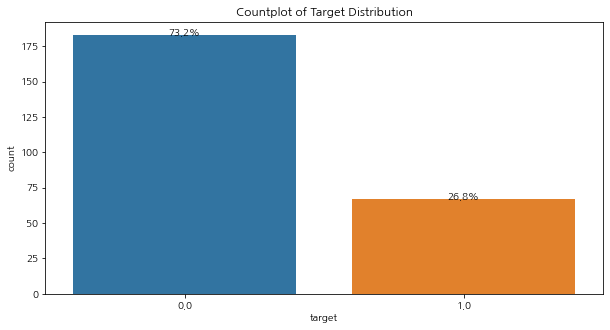

In [30]:
plt.figure(figsize=(10,5))
ax = sns.countplot(target)
write_percent(ax, len(train))
plt.title('Countplot of Target Distribution')
plt.show()

- 데이터 셋이 target 0 은 73%, target 1은 27%로 불균형한 것을 확인할 수 있다.
- target 0이 target 1보다 약 3배정도 된다고 할 수 있다.

#### Feature Distribution
- 5개의 random features을 선택하여 분포 확인

In [46]:
import random

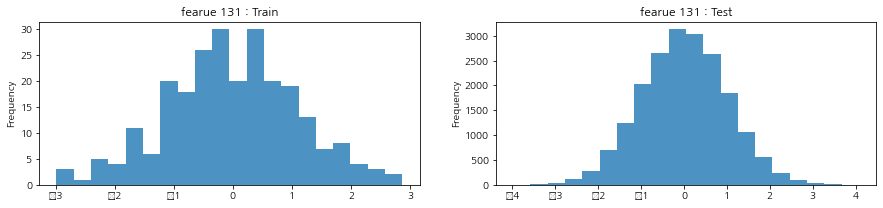

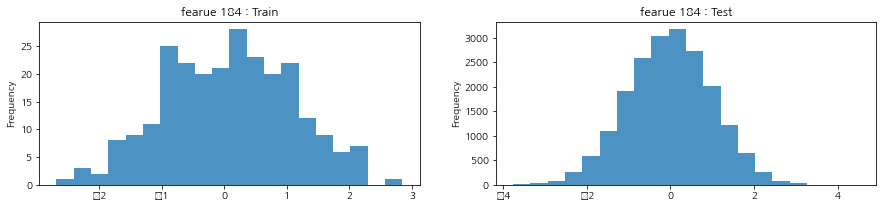

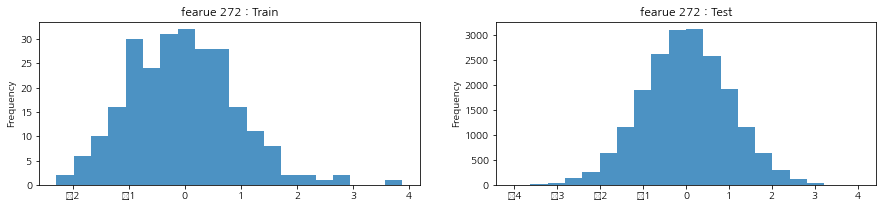

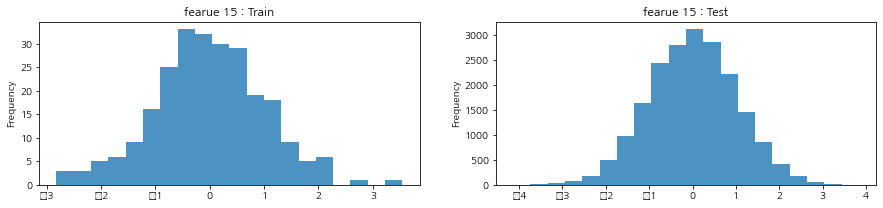

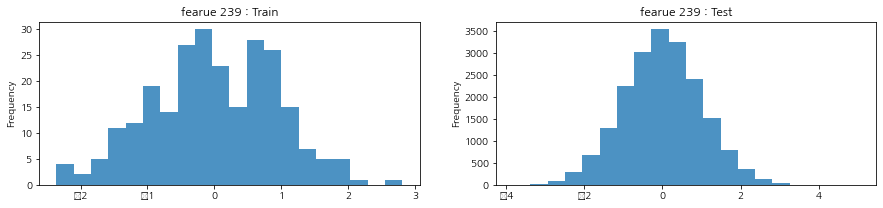

In [48]:
random.seed(5)
for x in range(0,5):
    random_feature = random.randint(1,299)
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,3))
    train[str(random_feature)].plot(kind='hist',ax=ax1, bins=20, alpha=0.8,
                                   title = 'fearue {} : Train'.format(random_feature))
    test[str(random_feature)].plot(kind='hist',ax=ax2, bins=20, alpha=0.8,
                                   title = 'fearue {} : Test'.format(random_feature))
    plt.show()

- train 데이터는 완전한 정규분포는 아니지만 거의 symmetric 해 보이고, 평균과 분산이 크게 다르지 않은 것으로 보인다.
- test 데이터는 정규분포에 가까운 것을 확인할 수 있다.

#### heatmap

In [52]:
data = train.drop(['id','target'], axis=1)
data

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,-0.443,-0.338,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,0.557,1.202,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,-0.624,-0.017,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,-0.118,-0.638,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,-0.656,-0.499,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,-0.068,-0.184,-1.153,0.610,0.414,1.557,-0.234,0.950,0.896,1.416,...,1.492,1.430,-0.333,-0.200,-1.073,0.797,1.980,1.191,1.032,-0.402
246,-0.234,-1.373,-2.050,-0.408,-0.255,0.784,0.986,-0.891,-0.268,-0.569,...,-0.996,0.678,1.395,0.714,0.215,-0.537,-1.267,-1.021,0.747,0.128
247,-2.327,-1.834,-0.762,0.660,-0.858,-2.764,-0.539,-0.065,0.549,1.474,...,-1.237,-0.620,0.670,-2.010,0.438,1.972,-0.379,0.676,-1.220,-0.855
248,-0.451,-0.204,-0.762,0.261,0.022,-1.487,-1.122,0.141,0.369,-0.173,...,0.729,0.411,2.366,-0.021,0.160,0.045,0.208,-2.117,-0.546,-0.093


In [64]:
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

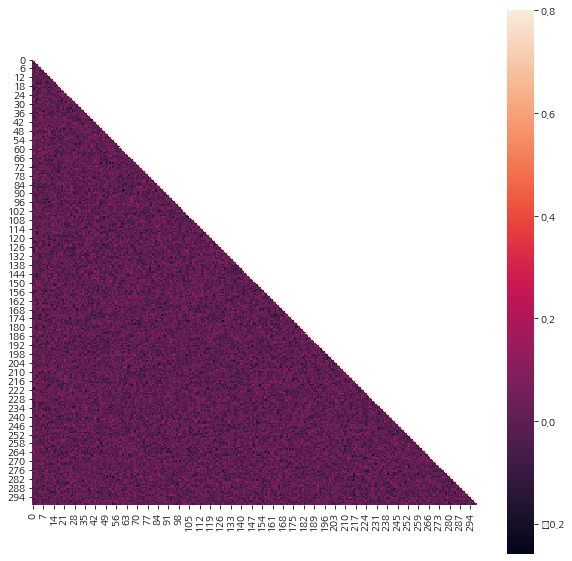

In [65]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True)

- 정확한 상관계수는 확인하기 어렵지만 color bar의 범위가 [-0.2 ~ 0.2 ] 이고 히트맵의 색상을 통해 feature들 중 높은 상관관계를 가진 feature는 없다고 할 수 있다.